In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\dell\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\dell\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\dell\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_loop.start()
  File "C:\Users\dell\anaconda3\Lib\site-packages

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pyt

In [4]:
ds = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\vgsales new.csv")
ds.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [5]:
ds.shape

(16598, 11)

In [6]:
ds.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [7]:
ds.loc[ds.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [8]:
ds.loc[ds.duplicated(subset=['Name'])].head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
92,702,Mario Bros.,NES,1983.0,Platform,Nintendo,0.51,0.12,1.63,0.02,2.28
95,1811,Donkey Kong,NES,1983.0,Platform,Nintendo,0.23,0.05,0.84,0.01,1.13
97,1863,Popeye,NES,1983.0,Platform,Nintendo,0.51,0.12,0.45,0.02,1.10
117,1640,Pac-Man,NES,1984.0,Puzzle,Namco Bandai Games,0.27,0.08,0.85,0.02,1.22
133,4729,Dig Dug,NES,1985.0,Puzzle,Namco Bandai Games,0.00,0.00,0.41,0.00,0.41


In [9]:
ds.query('Name == "Mario Bros."')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
57,1165,Mario Bros.,2600,1982.0,Platform,Atari,1.48,0.09,0.00,0.02,1.59
92,702,Mario Bros.,NES,1983.0,Platform,Nintendo,0.51,0.12,1.63,0.02,2.28


In [10]:
ds = ds[['Rank', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

In [11]:
ds['Publisher'].value_counts()

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
ITT Family Games                   1
CBS Electronics                    1
Bomb                               1
Mycom                              1
Sears                              1
Name: count, Length: 578, dtype: int64

In [12]:
df =ds 

In [13]:
ds.isnull().sum()

Rank              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [14]:
publisher_freq = df['Publisher'].value_counts()

# Step 2: Define frequency thresholds using quantiles
quantiles = publisher_freq.quantile([0.25, 0.5, 0.75])
thresholds = {
    'Least Freq': publisher_freq <= quantiles[0.25],
    'Low Freq': (publisher_freq > quantiles[0.25]) & (publisher_freq <= quantiles[0.5]),
    'Mid Freq': (publisher_freq > quantiles[0.5]) & (publisher_freq <= quantiles[0.75]),
    'Most Freq': publisher_freq > quantiles[0.75],
}

# Step 3: Map publishers to frequency categories
def assign_frequency_category(publisher):
    if pd.isna(publisher):
        return 0  # Assign 'Other' for NaN values
    freq = publisher_freq.get(publisher, 0)
    if thresholds['Least Freq'].get(publisher, False):
        return 1  # Least Freq
    elif thresholds['Low Freq'].get(publisher, False):
        return 2  # Low Freq
    elif thresholds['Mid Freq'].get(publisher, False):
        return 3  # Mid Freq
    else:
        return 4  # Most Freq

# Apply the function to the Publisher column
df['Frequency_Category'] = df['Publisher'].apply(assign_frequency_category)

print(df)

        Rank Platform    Year         Genre           Publisher  NA_Sales  \
0        259     2600  1980.0       Shooter               Atari      4.00   
1        545     2600  1980.0       Shooter               Atari      2.56   
2       1768     2600  1980.0          Misc          Activision      1.07   
3       1971     2600  1980.0          Misc               Atari      0.99   
4       2671     2600  1980.0      Fighting          Activision      0.72   
...      ...      ...     ...           ...                 ...       ...   
16593  16310       GC     NaN        Racing             Unknown      0.01   
16594  16330       PC     NaN       Shooter  Namco Bandai Games      0.01   
16595  16369      PS3     NaN     Adventure             Unknown      0.01   
16596  16430       GC     NaN  Role-Playing             Unknown      0.01   
16597  16496      3DS     NaN        Action             Unknown      0.00   

       EU_Sales  JP_Sales  Other_Sales  Global_Sales  Frequency_Category  


In [15]:
df = df.rename(columns={"Frequency_Category":"pub_freq"})

In [16]:
df.columns

Index(['Rank', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'pub_freq'],
      dtype='object')

In [17]:
df = df[['Rank', 'Platform', 'Year', 'Genre', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'pub_freq']]

In [18]:
df.head()

,Rank,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,pub_freq
0,259,2600,1980.0,Shooter,4.00,0.26,0.0,0.05,4.31,4
1,545,2600,1980.0,Shooter,2.56,0.17,0.0,0.03,2.76,4
2,1768,2600,1980.0,Misc,1.07,0.07,0.0,0.01,1.15,4
3,1971,2600,1980.0,Misc,0.99,0.05,0.0,0.01,1.05,4
4,2671,2600,1980.0,Fighting,0.72,0.04,0.0,0.01,0.77,4


In [19]:
df["Genre"].value_counts()

Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

In [30]:
import sklearn
print(sklearn.__version__)

1.6.1


In [39]:
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'Genre' column into one-hot encoded values
encoded_genres = encoder.fit_transform(df[['Genre']])

# Verify the number of columns after encoding
print(f"Number of columns after encoding: {encoded_genres.shape[1]}")

# Create a DataFrame with the encoded genres and use get_feature_names_out() to name the columns
encoded_genres_df = pd.DataFrame(encoded_genres, columns=encoder.get_feature_names_out(['Genre']))

# Verify the names of the columns
print(f"Column names after encoding: {encoded_genres_df.columns.tolist()}")

# Concatenate the original DataFrame (excluding the 'Genre' column) with the encoded genres
df = pd.concat([df.drop(columns=['Genre']), encoded_genres_df], axis=1)

Number of columns after encoding: 12
Column names after encoding: ['Genre_Action', 'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy']


In [40]:
df.columns

Index(['Rank', 'Platform', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales', 'Global_Sales', 'pub_freq', 'Genre_Action',
       'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform',
       'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy'],
      dtype='object')

In [41]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming df is your DataFrame

# Create the SimpleImputer with strategy 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to the 'Year' column
df['Year'] = imputer.fit_transform(df[['Year']])

# Display the DataFrame after imputation
print(df.head())

   Rank Platform    Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0   259     2600  1980.0      4.00      0.26       0.0         0.05   
1   545     2600  1980.0      2.56      0.17       0.0         0.03   
2  1768     2600  1980.0      1.07      0.07       0.0         0.01   
3  1971     2600  1980.0      0.99      0.05       0.0         0.01   
4  2671     2600  1980.0      0.72      0.04       0.0         0.01   

   Global_Sales  pub_freq  Genre_Action  ...  Genre_Fighting  Genre_Misc  \
0          4.31         4           0.0  ...             0.0         0.0   
1          2.76         4           0.0  ...             0.0         0.0   
2          1.15         4           0.0  ...             0.0         1.0   
3          1.05         4           0.0  ...             0.0         1.0   
4          0.77         4           0.0  ...             1.0         0.0   

   Genre_Platform  Genre_Puzzle  Genre_Racing  Genre_Role-Playing  \
0             0.0           0.0           0.0  

In [42]:
df.isnull().sum()

Rank                  0
Platform              0
Year                  0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
pub_freq              0
Genre_Action          0
Genre_Adventure       0
Genre_Fighting        0
Genre_Misc            0
Genre_Platform        0
Genre_Puzzle          0
Genre_Racing          0
Genre_Role-Playing    0
Genre_Shooter         0
Genre_Simulation      0
Genre_Sports          0
Genre_Strategy        0
dtype: int64

In [43]:
df.dtypes

Rank                    int64
Platform               object
Year                  float64
NA_Sales              float64
EU_Sales              float64
JP_Sales              float64
Other_Sales           float64
Global_Sales          float64
pub_freq                int64
Genre_Action          float64
Genre_Adventure       float64
Genre_Fighting        float64
Genre_Misc            float64
Genre_Platform        float64
Genre_Puzzle          float64
Genre_Racing          float64
Genre_Role-Playing    float64
Genre_Shooter         float64
Genre_Simulation      float64
Genre_Sports          float64
Genre_Strategy        float64
dtype: object

In [44]:
len(df['Platform'].value_counts())

31

In [45]:
df.columns

Index(['Rank', 'Platform', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales', 'Global_Sales', 'pub_freq', 'Genre_Action',
       'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform',
       'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy'],
      dtype='object')

In [46]:
df = df[['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales', 'Global_Sales', 'pub_freq', 'Genre_Action',
       'Genre_Adventure', 'Genre_Fighting', 'Genre_Misc', 'Genre_Platform',
       'Genre_Puzzle', 'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy']]  
df.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,pub_freq,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,259,1980.0,4.00,0.26,0.0,0.05,4.31,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,545,1980.0,2.56,0.17,0.0,0.03,2.76,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1768,1980.0,1.07,0.07,0.0,0.01,1.15,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1971,1980.0,0.99,0.05,0.0,0.01,1.05,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2671,1980.0,0.72,0.04,0.0,0.01,0.77,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df.dtypes

Rank                    int64
Year                  float64
NA_Sales              float64
EU_Sales              float64
JP_Sales              float64
Other_Sales           float64
Global_Sales          float64
pub_freq                int64
Genre_Action          float64
Genre_Adventure       float64
Genre_Fighting        float64
Genre_Misc            float64
Genre_Platform        float64
Genre_Puzzle          float64
Genre_Racing          float64
Genre_Role-Playing    float64
Genre_Shooter         float64
Genre_Simulation      float64
Genre_Sports          float64
Genre_Strategy        float64
dtype: object

In [48]:
df['pub_freq'].value_counts()

pub_freq
4    15301
3      751
2      294
1      194
0       58
Name: count, dtype: int64

In [49]:
from sklearn.preprocessing import StandardScaler 

# Exclude the target variable before scaling
target = df["Global_Sales"]
features = df.drop(columns=["Global_Sales"])


# Apply Standard Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a new DataFrame for scaled features
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Add the target variable back to the DataFrame
scaled_df["Global_Sales"] = target

In [50]:
import seaborn as sns

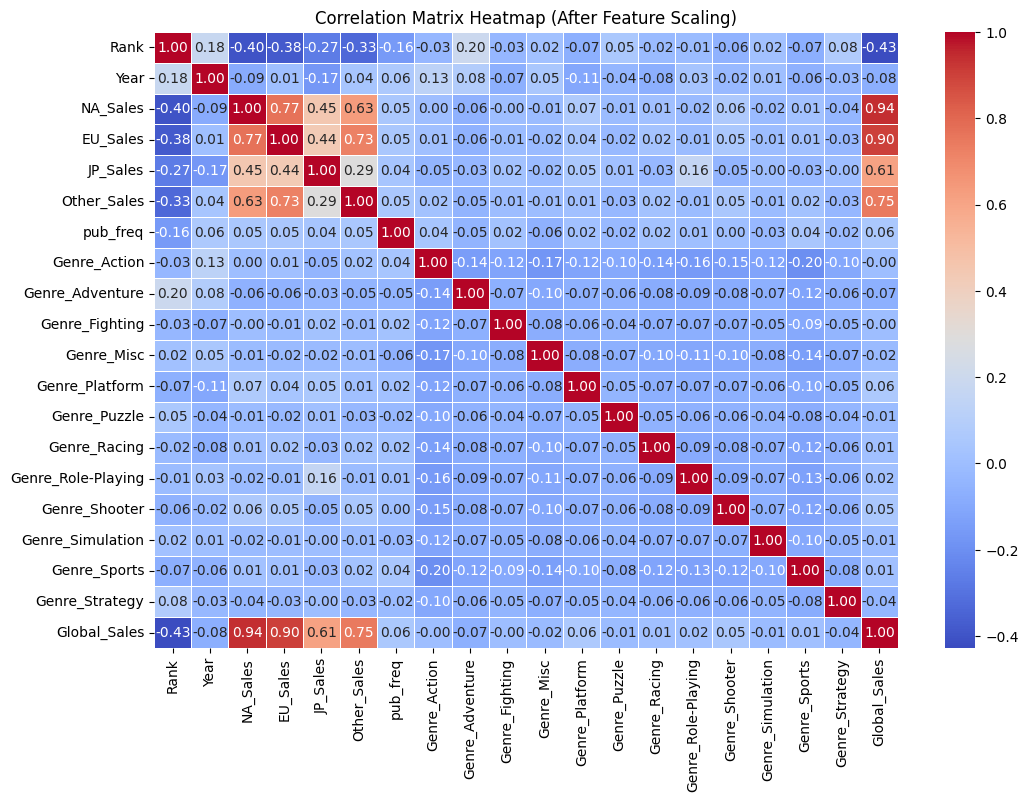

Correlations with Global_Sales:
Global_Sales          1.000000
NA_Sales              0.941047
EU_Sales              0.902836
Other_Sales           0.748331
JP_Sales              0.611816
Genre_Platform        0.061223
pub_freq              0.057256
Genre_Shooter         0.047899
Genre_Role-Playing    0.017314
Genre_Racing          0.008927
Genre_Sports          0.007796
Genre_Fighting       -0.001204
Genre_Action         -0.003001
Genre_Simulation     -0.012844
Genre_Puzzle         -0.014290
Genre_Misc           -0.015770
Genre_Strategy       -0.037284
Genre_Adventure      -0.065521
Year                 -0.075303
Rank                 -0.427407
Name: Global_Sales, dtype: float64


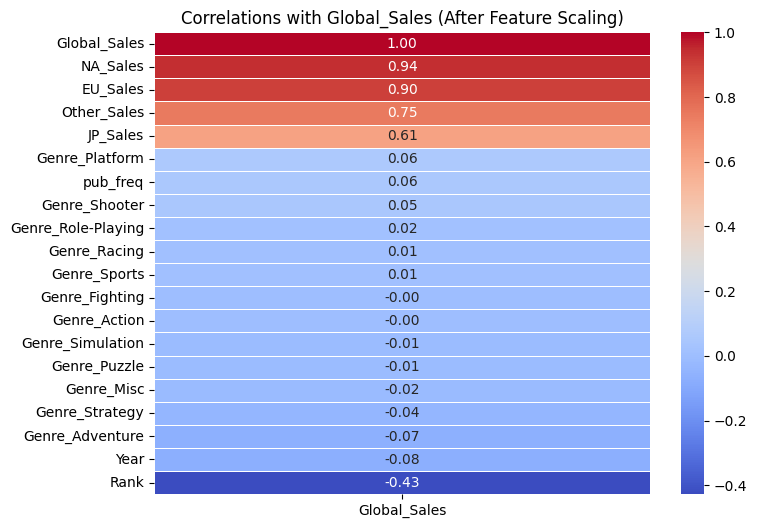

In [51]:
correlation_matrix = scaled_df.corr()

# Plot the heatmap for the correlation matrix
pyt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
pyt.title('Correlation Matrix Heatmap (After Feature Scaling)')
pyt.show()

# Display correlations with the target variable "Global_Sales"
target_corr = correlation_matrix["Global_Sales"].sort_values(ascending=False)
print("Correlations with Global_Sales:")
print(target_corr)

# Highlight correlations with the target variable in the heatmap
pyt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[["Global_Sales"]].sort_values(by="Global_Sales", ascending=False),
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
pyt.title('Correlations with Global_Sales (After Feature Scaling)')
pyt.show()

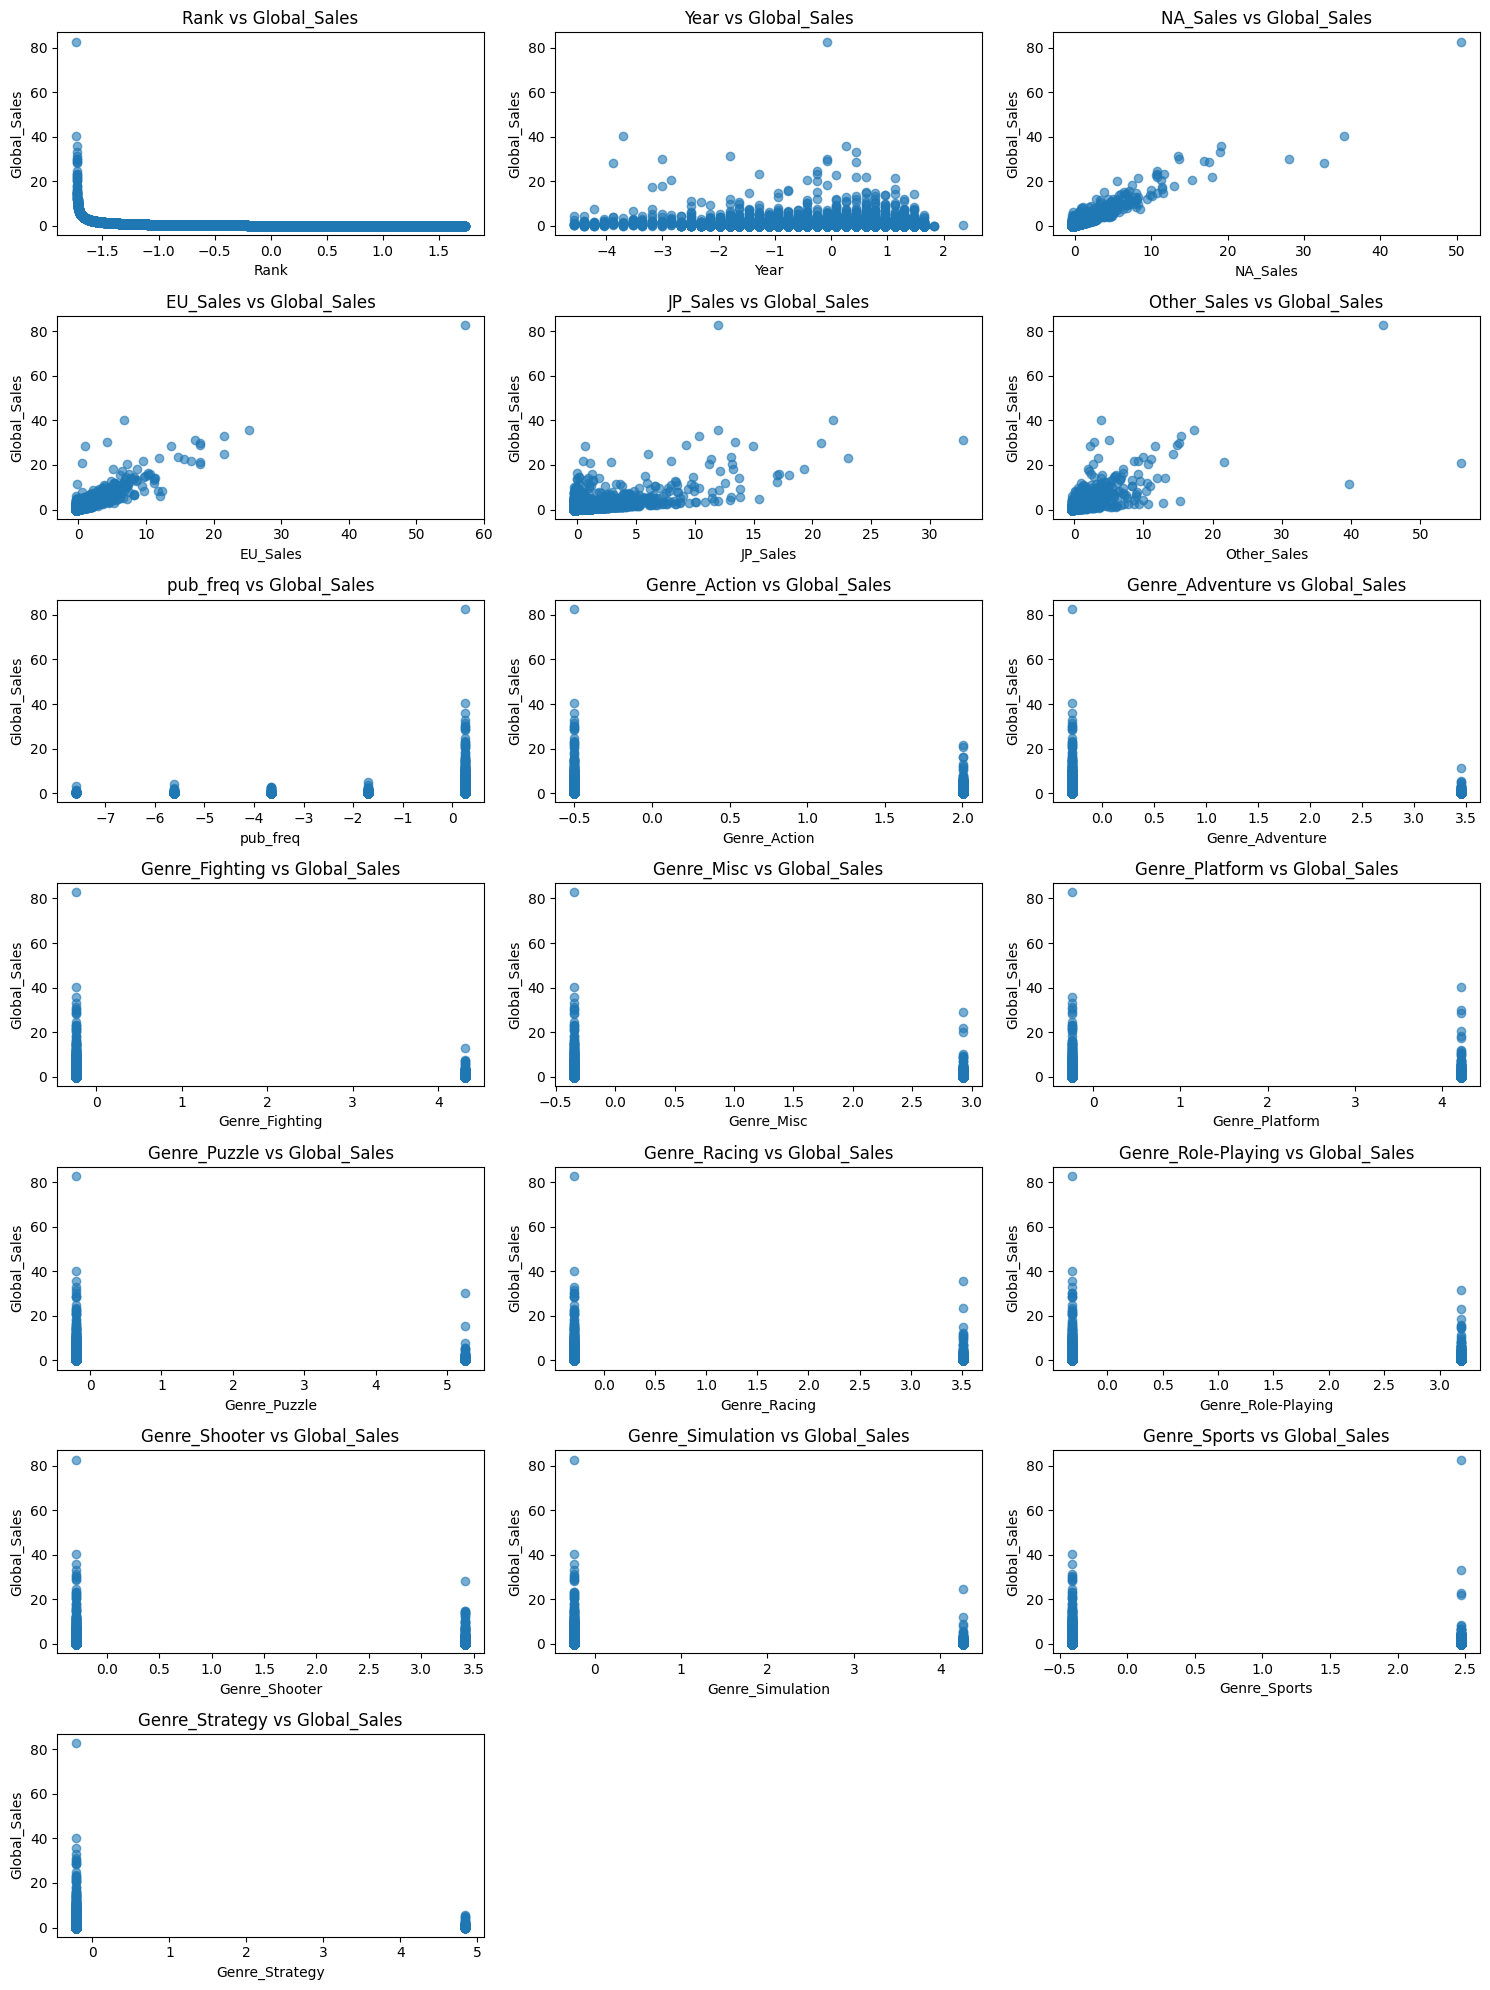

In [52]:
# Scatter plots for each feature against the target variable
features = scaled_df.drop(columns=["Global_Sales"]).columns

pyt.figure(figsize=(15, 20))  # Adjust figure size to fit all subplots
for i, feature in enumerate(features, start=1):
    pyt.subplot((len(features) + 2) // 3, 3, i)  # Create a grid of subplots
    pyt.scatter(scaled_df[feature], scaled_df["Global_Sales"], alpha=0.6)
    pyt.title(f'{feature} vs Global_Sales')
    pyt.xlabel(feature)
    pyt.ylabel('Global_Sales')

pyt.tight_layout()
pyt.show()

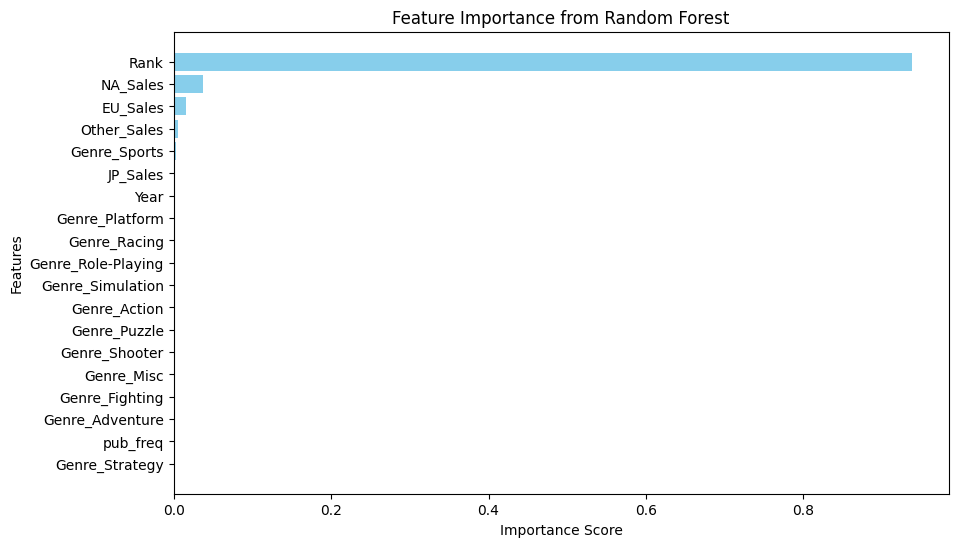

In [53]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# Separate features and target variable
X = scaled_df.drop(columns=["Global_Sales"])
y = scaled_df["Global_Sales"]

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importance = rf.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
import matplotlib.pyplot as plt

pyt.figure(figsize=(10, 6))
pyt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
pyt.xlabel('Importance Score')
pyt.ylabel('Features')
pyt.title('Feature Importance from Random Forest')
pyt.gca().invert_yaxis()  # Invert y-axis for descending order
pyt.show()

<Figure size 1000x600 with 0 Axes>

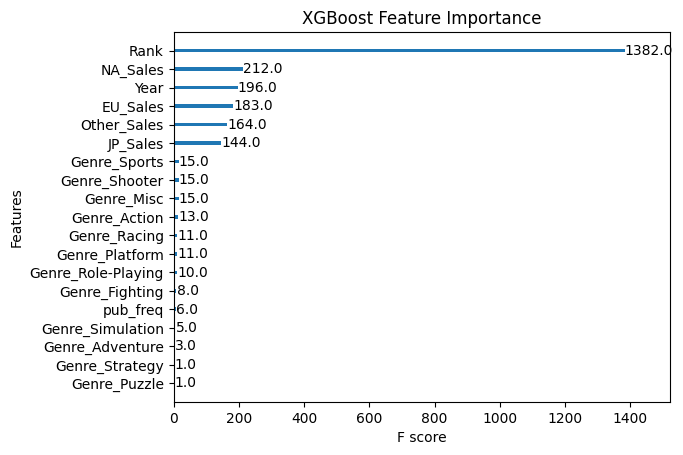

In [54]:
from xgboost import XGBRegressor, plot_importance
import matplotlib.pyplot as plt

# Train an XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X, y)

# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb, importance_type='weight', title='XGBoost Feature Importance', grid=False)
plt.show()

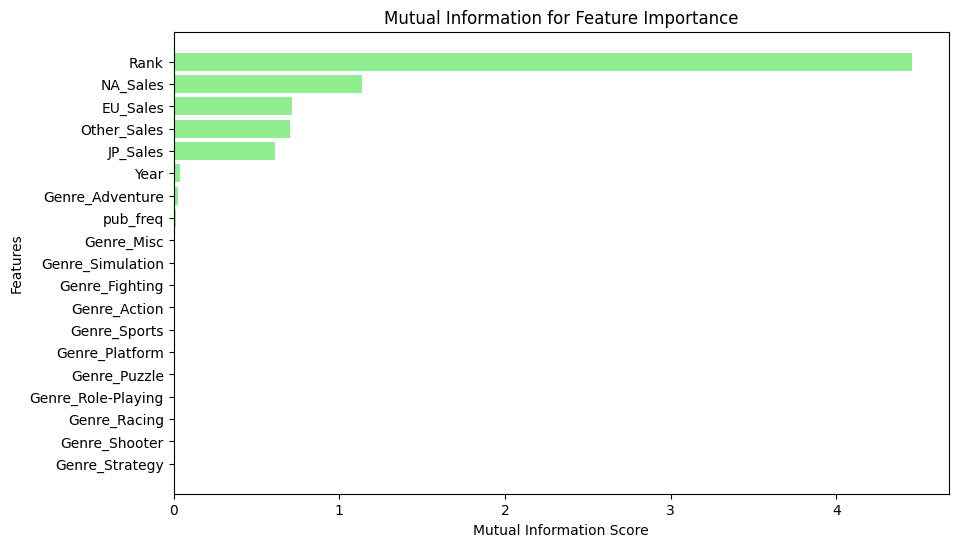

In [55]:
from sklearn.feature_selection import mutual_info_regression

# Compute mutual information
mi = mutual_info_regression(X, y, random_state=42)

# Create a DataFrame for better visualization
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi
}).sort_values(by='Mutual Information', ascending=False)

# Plot mutual information
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['Mutual Information'], color='lightgreen')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Mutual Information for Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [56]:
df.columns 

Index(['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales', 'pub_freq', 'Genre_Action', 'Genre_Adventure',
       'Genre_Fighting', 'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle',
       'Genre_Racing', 'Genre_Role-Playing', 'Genre_Shooter',
       'Genre_Simulation', 'Genre_Sports', 'Genre_Strategy'],
      dtype='object')

In [57]:
df = df[['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales']]
df.head()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,1980.0,4.00,0.26,0.0,0.05,4.31
1,545,1980.0,2.56,0.17,0.0,0.03,2.76
2,1768,1980.0,1.07,0.07,0.0,0.01,1.15
3,1971,1980.0,0.99,0.05,0.0,0.01,1.05
4,2671,1980.0,0.72,0.04,0.0,0.01,0.77


In [58]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X

array([[2.5900e+02, 1.9800e+03, 4.0000e+00, 2.6000e-01, 0.0000e+00,
        5.0000e-02],
       [5.4500e+02, 1.9800e+03, 2.5600e+00, 1.7000e-01, 0.0000e+00,
        3.0000e-02],
       [1.7680e+03, 1.9800e+03, 1.0700e+00, 7.0000e-02, 0.0000e+00,
        1.0000e-02],
       ...,
       [1.6369e+04, 2.0090e+03, 1.0000e-02, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.6430e+04, 2.0090e+03, 1.0000e-02, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.6496e+04, 2.0090e+03, 0.0000e+00, 1.0000e-02, 0.0000e+00,
        0.0000e+00]], shape=(16598, 6))

In [60]:
y

array([4.31, 2.76, 1.15, ..., 0.01, 0.01, 0.01], shape=(16598,))

In [61]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.67823302, -4.56772889,  4.57392276,  0.22430223, -0.25149161,
         0.01027125],
       [-1.6185466 , -4.56772889,  2.81063967,  0.04620291, -0.25149161,
        -0.095783  ],
       [-1.3633141 , -4.56772889,  0.98613146, -0.15168523, -0.25149161,
        -0.20183726],
       ...,
       [ 1.68382382,  0.44059636, -0.31184082, -0.29020692, -0.25149161,
        -0.25486439],
       [ 1.69655414,  0.44059636, -0.31184082, -0.29020692, -0.25149161,
        -0.25486439],
       [ 1.71032793,  0.44059636, -0.32408584, -0.27041811, -0.25149161,
        -0.25486439]], shape=(16598, 6))

In [62]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
X_train

array([[-1.45200896,  1.13139984,  0.07999987,  1.17416528, -0.0898265 ,
         1.38897656],
       [ 1.34594859,  0.7859981 , -0.29959579, -0.29020692, -0.25149161,
        -0.25486439],
       [ 0.77037113, -0.07750625, -0.32408584, -0.29020692, -0.02516046,
        -0.25486439],
       ...,
       [-0.83677969, -0.25020712, -0.05469536,  0.04620291, -0.25149161,
         0.06329838],
       [-0.00993492, -1.80451496, -0.20163562, -0.15168523, -0.25149161,
        -0.20183726],
       [ 1.16146328,  1.47680158, -0.32408584, -0.29020692, -0.12215952,
        -0.25486439]], shape=(13278, 6))

In [63]:
y_train

array([1.44, 0.03, 0.07, ..., 0.46, 0.17, 0.04], shape=(13278,))

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR
from xgboost import XGBRegressor
reg_RFR = RandomForestRegressor(n_estimators = 100,random_state=0) 
reg_XGB = XGBRegressor()
reg_SVR = SVR(kernel = 'linear')
reg_DT = DecisionTreeRegressor(random_state=0)

In [65]:
reg_RFR.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [66]:
reg_DT.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [67]:
# SupportVectorRegression : SVR(SVM)
reg_SVR.fit(X_train,y_train)

SVR(kernel='linear')

In [68]:
reg_XGB.fit(X_train,y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [69]:
y_pred_RFR = reg_RFR.predict(X_test)
y_pred_RFR

array([0.22, 0.21, 0.46, ..., 0.07, 0.25, 0.05], shape=(3320,))

In [70]:
y_pred_DT = reg_DT.predict(X_test)
y_pred_DT

array([0.22, 0.21, 0.46, ..., 0.07, 0.25, 0.05], shape=(3320,))

In [71]:
y_pred_SVR = reg_SVR.predict(X_test)
y_pred_SVR

array([0.29345716, 0.27822659, 0.5202289 , ..., 0.1161122 , 0.31320495,
       0.10942452], shape=(3320,))

In [72]:
y_pred_XGB= reg_XGB.predict(X_test)
y_pred_XGB

array([0.2204089 , 0.2086714 , 0.458443  , ..., 0.06997771, 0.2517298 ,
       0.05016634], shape=(3320,), dtype=float32)

In [73]:
from sklearn.metrics import r2_score, mean_squared_error

In [74]:
n = len(y_test)  # Total number of data points

# Replace this with the actual number of features in your regression model
p = X_train.shape[1]  # Assuming X_train is your training data for predictors

In [75]:
y_pred = y_pred_RFR
# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R² score
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the results
print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adj_r2:.4f}")
print(f"RMSE: {rmse:.4f}")


R² Score: 0.8397
Adjusted R² Score: 0.8394
RMSE: 0.8048


In [76]:
y_pred = y_pred_DT
# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R² score
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the results
print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adj_r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.8346
Adjusted R² Score: 0.8343
RMSE: 0.8176


In [77]:
y_pred = y_pred_XGB
# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R² score
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the results
print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adj_r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.8642
Adjusted R² Score: 0.8640
RMSE: 0.7408


In [78]:
y_pred = y_pred_SVR
# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R² score
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the results
print(f"R² Score: {r2:.4f}")
print(f"Adjusted R² Score: {adj_r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9990
Adjusted R² Score: 0.9990
RMSE: 0.0631


In [79]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error

# F (number of folds for cross-validation)
F = 5  

# Perform F-fold cross-validation
cv_scores = cross_val_score(reg_SVR, X_train, y_train, cv=F, scoring='r2')  # R² scores for each fold

# Calculate mean and standard deviation of R² scores
mean_r2 = np.mean(cv_scores)
std_r2 = np.std(cv_scores)

# Generate cross-validated predictions on training data
y_pred_cv = cross_val_predict(reg_SVR, X_train, y_train, cv=F)

# Calculate RMSE and R² for cross-validated predictions
rmse_cv = np.sqrt(mean_squared_error(y_train, y_pred_cv))
r2_cv = r2_score(y_train, y_pred_cv)

# Display results
print(f"Cross-Validation (F={F}) Results on Training Data:")
print(f"Mean R² Score: {mean_r2:.4f} ± {std_r2:.4f}")
print(f"RMSE (Cross-Validated Predictions): {rmse_cv:.4f}")
print(f"R² Score (Cross-Validated Predictions): {r2_cv:.4f}")

Cross-Validation (F=5) Results on Training Data:
Mean R² Score: 0.9975 ± 0.0008
RMSE (Cross-Validated Predictions): 0.0671
R² Score (Cross-Validated Predictions): 0.9978


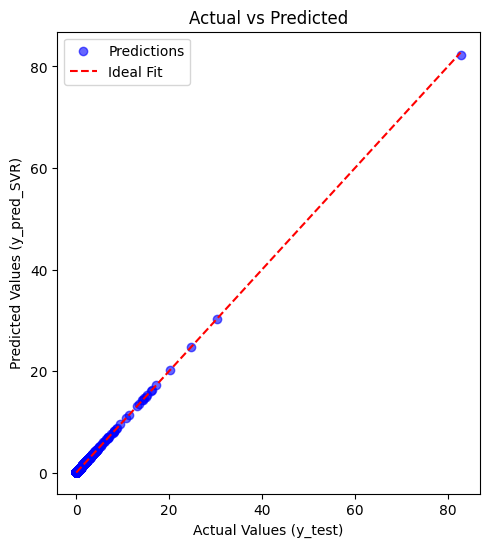

In [80]:
# Scatter Plot: True vs Predicted
pyt.figure(figsize=(12, 6))
pyt.subplot(1, 2, 1)
pyt.scatter(y_test, y_pred_SVR, color='blue', alpha=0.6, label='Predictions')
pyt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit')
pyt.xlabel('Actual Values (y_test)')
pyt.ylabel('Predicted Values (y_pred_SVR)')
pyt.title('Actual vs Predicted')
pyt.legend()

In [ ]:
# Residual Plot
pyt.subplot(1, 2, 2)
residuals = y_test - y_pred_SVR
pyt.scatter(y_pred_SVR, residuals, color='purple', alpha=0.6)
pyt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
pyt.xlabel('Predicted Values (y_pred_SVR)')
pyt.ylabel('Residuals (y_test - y_pred_SVR)')
pyt.title('Residual Plot')
pyt.legend()

pyt.tight_layout()
pyt.show()